In [4]:
import cv2
import os
import numpy as np
import random
from tkinter import *
from tkinter import Tk
from tkinter import ttk
import sklearn
from sklearn.svm import SVC
#from keras_preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
#from keras.applications.vgg16 import VGG16
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [5]:
data_path = r"C:\Users\user\Desktop\SelectedProject\image\SVM\archive (6)"

In [6]:
width=50
height=50
counter = 0
X = []
#images
Y = [] 
#labels
 

In [7]:
categories = os.listdir(data_path)#["alien","predator"]
for category in categories:  # this loop to know how many images in categories
    folder_path = os.path.join(data_path, category)  # make folder empty has the same path for dataset
    img_names = os.listdir(folder_path)  # put each image in this folder
        #a\s\d\normal  x=["a.jpg","2,jpg"......2000.jpg]
        #              y=["normal"]
    for img_name in img_names:
            #img_path = os.path.join(folder_path, img_name)
        fullpath = os.path.join(data_path, category, img_name)
        try:
            img = cv2.imread(fullpath,0)
            img = cv2.resize(img, (height, width))
            img_feature = np.reshape(img,(height*width))
            X.append(img_feature)
            Y.append(category)
            counter += 1
            print("Reprocessing Image Number: ", counter)
        except:
            print("Error in ==> ", counter)

Reprocessing Image Number:  1
Reprocessing Image Number:  2
Reprocessing Image Number:  3
Reprocessing Image Number:  4
Reprocessing Image Number:  5
Reprocessing Image Number:  6
Reprocessing Image Number:  7
Reprocessing Image Number:  8
Reprocessing Image Number:  9
Reprocessing Image Number:  10
Reprocessing Image Number:  11
Reprocessing Image Number:  12
Reprocessing Image Number:  13
Reprocessing Image Number:  14
Reprocessing Image Number:  15
Reprocessing Image Number:  16
Reprocessing Image Number:  17
Reprocessing Image Number:  18
Reprocessing Image Number:  19
Reprocessing Image Number:  20
Reprocessing Image Number:  21
Reprocessing Image Number:  22
Reprocessing Image Number:  23
Reprocessing Image Number:  24
Reprocessing Image Number:  25
Reprocessing Image Number:  26
Reprocessing Image Number:  27
Reprocessing Image Number:  28
Reprocessing Image Number:  29
Reprocessing Image Number:  30
Reprocessing Image Number:  31
Reprocessing Image Number:  32
Reprocessing Imag

Reprocessing Image Number:  401
Reprocessing Image Number:  402
Reprocessing Image Number:  403
Reprocessing Image Number:  404
Reprocessing Image Number:  405
Reprocessing Image Number:  406
Reprocessing Image Number:  407
Reprocessing Image Number:  408
Reprocessing Image Number:  409
Reprocessing Image Number:  410
Reprocessing Image Number:  411
Reprocessing Image Number:  412
Reprocessing Image Number:  413
Reprocessing Image Number:  414
Reprocessing Image Number:  415
Reprocessing Image Number:  416
Reprocessing Image Number:  417
Reprocessing Image Number:  418
Reprocessing Image Number:  419
Reprocessing Image Number:  420
Reprocessing Image Number:  421
Reprocessing Image Number:  422
Reprocessing Image Number:  423
Reprocessing Image Number:  424
Reprocessing Image Number:  425
Reprocessing Image Number:  426
Reprocessing Image Number:  427
Reprocessing Image Number:  428
Reprocessing Image Number:  429
Reprocessing Image Number:  430
Reprocessing Image Number:  431
Reproces

In [8]:
imgs = np.array(X)
lbls = np.array(Y)


    # Label Encoding
le = preprocessing.LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)

    #train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=20, random_state=0)

    # Train and Test Split

train_x, test_x, train_y, test_y = train_test_split(imgs, lbls_encoded, test_size=0.1,random_state=5)

train_x, x_val, train_y, y_val = train_test_split(train_x, train_y, test_size=0.1, random_state=5)




In [9]:

# Normalization
train_x, test_x = train_x / 50.0, test_x / 50.0

In [10]:
from sklearn.svm import SVC

In [11]:
svc=SVC(C=1,kernel="rbf",gamma='auto')
svc.fit(train_x,train_y)
ypred = svc.predict(test_x)

from sklearn.metrics import accuracy_score
print('accuracy : ',accuracy_score(test_y,ypred))

accuracy :  0.7666666666666667


In [12]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


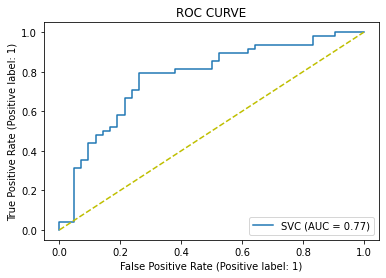

In [13]:
 #roc curve
fig = plot_roc_curve(svc,test_x,test_y)
plt.title("ROC CURVE")
plt.plot([0, 1], [0, 1], 'y--')
plt.show()

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
#from sklearn import cross_validation

In [15]:
X=train_x
y=train_y

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[31 11]
 [10 38]]


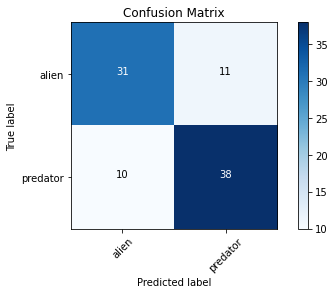

In [17]:

cm_plot_labels =["alien","predator"]
cm = confusion_matrix(test_y, ypred)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(svc, X, y, cv=80,return_times=True)
plt.plot(train_sizes,np.mean(train_scores,axis=1))